In [1]:
import pandas as pd

In [4]:
diabetes = pd.read_csv("/home/priyank/Downloads/FULL_TENSORFLOW_NOTES__AND_DATA/Tensorflow-Bootcamp-master/02-TensorFlow-Basics/pima-indians-diabetes.csv")

In [5]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [6]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [7]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree',]

In [8]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply( lambda x : (x - x.min())/(x.max() - x.min()))

In [9]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [10]:
import tensorflow as tf

In [11]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [14]:
num_preg = tf.feature_column.numeric_column("Number_pregnant")
plasma_gluc = tf.feature_column.numeric_column("Glucose_concentration")
dias_press = tf.feature_column.numeric_column("Blood_pressure")
tricep = tf.feature_column.numeric_column("Triceps")
insulin = tf.feature_column.numeric_column("Insulin")
bmi = tf.feature_column.numeric_column("BMI")
diabetes_pedigree = tf.feature_column.numeric_column("Pedigree")
age = tf.feature_column.numeric_column("Age")


In [15]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group' , ['A','B','C','D'])

In [16]:
assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group' , hash_bucket_size=10)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

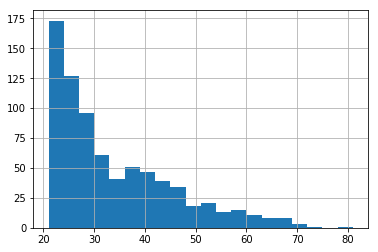

In [18]:
diabetes['Age'].hist(bins=20)

In [19]:
age_bucket = tf.feature_column.bucketized_column(age , boundaries= [20,30,40,50,60,70,80])

In [20]:
feat_cols = [num_preg,plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket ]

In [21]:
#train test split

In [22]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [23]:
x_data = diabetes.drop('Class', axis= 1)

In [25]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [26]:
labels = diabetes['Class']

In [28]:
#labels

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
...     x_data, labels, test_size=0.30, random_state=101)

In [33]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, 
                                                batch_size = 10, num_epochs = 1000,
                                                shuffle = True)

In [34]:
model = tf.estimator.LinearClassifier(feature_columns= feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_model_dir': '/tmp/tmpfga7udrp', '_save_checkpoints_steps': None, '_log_step_count_steps': 100}


In [35]:
model.train(input_fn= input_func, steps= 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpfga7udrp/model.ckpt.
INFO:tensorflow:step = 1, loss = 6.931472
INFO:tensorflow:global_step/sec: 156.789
INFO:tensorflow:step = 101, loss = 4.505235 (0.639 sec)
INFO:tensorflow:global_step/sec: 160.992
INFO:tensorflow:step = 201, loss = 5.9323487 (0.636 sec)
INFO:tensorflow:global_step/sec: 145.869
INFO:tensorflow:step = 301, loss = 5.5305443 (0.677 sec)
INFO:tensorflow:global_step/sec: 170.512
INFO:tensorflow:step = 401, loss = 5.2561393 (0.595 sec)
INFO:tensorflow:global_step/sec: 159.437
INFO:tensorflow:step = 501, loss = 6.409393 (0.613 sec)
INFO:tensorflow:global_step/sec: 161.364
INFO:tensorflow:step = 601, loss = 4.529628 (0.624 sec)
INFO:tensorflow:global_step/sec: 160.446
INFO:tensorflow:step = 701, loss = 4.9537516 (0.628 sec)
INFO:tensorflow:global_step/sec: 185.243
INFO:tensorflow:step = 801, loss = 4.3814197 (0.569 sec)
INFO:tensorflow:global_step/sec: 127.641
INFO:tensorflow:s

In [37]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
        x = X_test,
        y = y_test,
        batch_size = 10,
        num_epochs = 1,
        shuffle = True)

In [38]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2020-07-25-13:42:34
INFO:tensorflow:Restoring parameters from /tmp/tmpfga7udrp/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2020-07-25-13:42:35
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.8039918, auc_precision_recall = 0.6514145, average_loss = 0.52503467, global_step = 1000, label/mean = 0.35064936, loss = 5.0534587, prediction/mean = 0.37711084


In [39]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8039918,
 'auc_precision_recall': 0.6514145,
 'average_loss': 0.52503467,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0534587,
 'prediction/mean': 0.37711084}


# Predictions

In [41]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
        x = X_test,
        y = y_test,
        batch_size = 10,
        num_epochs = 1,
        shuffle = False) 

In [42]:
predictions = model.predict(pred_input_func)

In [43]:
list(predictions)

INFO:tensorflow:Restoring parameters from /tmp/tmpfga7udrp/model.ckpt-1000


[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5404618], dtype=float32),
  'logits': array([0.16220188], dtype=float32),
  'probabilities': array([0.4595382, 0.5404618], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.64296514], dtype=float32),
  'logits': array([0.58825696], dtype=float32),
  'probabilities': array([0.3570349 , 0.64296514], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.38761848], dtype=float32),
  'logits': array([-0.45733392], dtype=float32),
  'probabilities': array([0.6123815 , 0.38761848], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.35800123], dtype=float32),
  'logits': array([-0.58405], dtype=float32),
  'probabilities': array([0.6419988 , 0.35800126], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=obje

# DNN Classifier

In [44]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_model_dir': '/tmp/tmpeb0m0jwa', '_save_checkpoints_steps': None, '_log_step_count_steps': 100}


In [45]:
dnn_model.train(input_fn= input_func ,steps= 1000)

ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _HashedCategoricalColumn(key='Group', hash_bucket_size=10, dtype=tf.string)

In [46]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group , dimension= 4)

In [47]:
feat_cols = [num_preg,plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_column, age_bucket ]

In [48]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size=10, num_epochs=1000, shuffle= True)

In [49]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_model_dir': '/tmp/tmp_uogzndp', '_save_checkpoints_steps': None, '_log_step_count_steps': 100}


In [50]:
dnn_model.train(input_fn= input_func ,steps= 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp_uogzndp/model.ckpt.
INFO:tensorflow:step = 1, loss = 7.0124474
INFO:tensorflow:global_step/sec: 269.407
INFO:tensorflow:step = 101, loss = 5.776318 (0.375 sec)
INFO:tensorflow:global_step/sec: 289.625
INFO:tensorflow:step = 201, loss = 6.04482 (0.345 sec)
INFO:tensorflow:global_step/sec: 291.474
INFO:tensorflow:step = 301, loss = 3.7958155 (0.341 sec)
INFO:tensorflow:global_step/sec: 267.394
INFO:tensorflow:step = 401, loss = 5.78551 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.266
INFO:tensorflow:step = 501, loss = 4.0577965 (0.372 sec)
INFO:tensorflow:global_step/sec: 223.549
INFO:tensorflow:step = 601, loss = 5.939467 (0.452 sec)
INFO:tensorflow:global_step/sec: 208.899
INFO:tensorflow:step = 701, loss = 4.3085785 (0.477 sec)
INFO:tensorflow:global_step/sec: 256.806
INFO:tensorflow:step = 801, loss = 6.793177 (0.391 sec)
INFO:tensorflow:global_step/sec: 245.585
INFO:tensorflow:step

In [57]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
        x = X_test,
        y = y_test,
        batch_size = 10,
        num_epochs = 1,
        shuffle = False)

In [58]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2020-07-25-13:56:34
INFO:tensorflow:Restoring parameters from /tmp/tmp_uogzndp/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2020-07-25-13:56:35
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.77922076, accuracy_baseline = 0.64935064, auc = 0.8338683, auc_precision_recall = 0.70599174, average_loss = 0.47825065, global_step = 1000, label/mean = 0.35064936, loss = 4.6031623, prediction/mean = 0.34064484


{'accuracy': 0.77922076,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8338683,
 'auc_precision_recall': 0.70599174,
 'average_loss': 0.47825065,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.6031623,
 'prediction/mean': 0.34064484}